In [15]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt


In [16]:
# reading the csv files for general information and prices
data_info = pd.read_csv('Data/gpu_info.csv')
data_prices = pd.read_csv('Data/gpu_prices.csv')

In [17]:
manufacturer = data_info['manufacturer'].tolist()
product = data_info['productName'].tolist()
vram = data_info['memSize'].tolist()
memory_bus = data_info['memBusWidth'].tolist()
gpu_clock = data_info['gpuClock'].tolist()
mem_clock = data_info['memClock'].tolist()
release_year = data_info['releaseYear'].tolist()

In [18]:
df1 = pd.DataFrame({
    'Manufacturer' : manufacturer,
    'Product' : product,
    'VRAM' : vram,
    'Memory Bus Width' : memory_bus,
    'GPU Clock' : gpu_clock,
    'Memory Clock' : mem_clock,
    'Release Year' : release_year
})

In [19]:
# Highest vram
vram = data_info.loc[data_info['memSize'].idxmax()]
print('GPU with the highest VRAM:\n')
print(vram)

# Highest Memory Bus
mem_bus = data_info.loc[data_info['memBusWidth'].idxmax()]
print('\nGPU the highest Memory Bus:\n')
print(mem_bus)

GPU with the highest VRAM:

manufacturer                  NVIDIA
productName      GeForce RTX 3090 Ti
releaseYear                     2022
memSize                           24
memBusWidth                      384
gpuClock                        1560
memClock                        1313
unifiedShader                  10752
tmu                              336
rop                              112
pixelShader                      NaN
vertexShader                     NaN
igp                               No
bus                     PCIe 4.0 x16
memType                       GDDR6X
gpuChip                        GA102
Name: 21, dtype: object

GPU the highest Memory Bus:

manufacturer               NVIDIA
productName      GeForce RTX 3080
releaseYear                  2022
memSize                        12
memBusWidth                   384
gpuClock                     1260
memClock                     1188
unifiedShader                8960
tmu                           280
rop                 

In [20]:
# Highest GPU clock
gpu_clock = data_info.loc[data_info['gpuClock'].idxmax()]
print('\nGPU the highest GPU Clock:\n')
print(gpu_clock)

# Highest Memory clock
mem_clock = data_info.loc[data_info['memClock'].idxmax()]
print('\nGPU the highest Memory Clock:\n')
print(mem_clock)


GPU the highest GPU Clock:

manufacturer                    AMD
productName      Radeon RX 6850M XT
releaseYear                    2022
memSize                          12
memBusWidth                     192
gpuClock                       2321
memClock                       2000
unifiedShader                  2560
tmu                             160
rop                              64
pixelShader                     NaN
vertexShader                    NaN
igp                              No
bus                    PCIe 4.0 x16
memType                       GDDR6
gpuChip                     Navi 22
Name: 38, dtype: object

GPU the highest Memory Clock:

manufacturer               NVIDIA
productName      GeForce GTX 1060
releaseYear                  2017
memSize                         6
memBusWidth                   192
gpuClock                     1506
memClock                     2257
unifiedShader                1280
tmu                            80
rop                            48

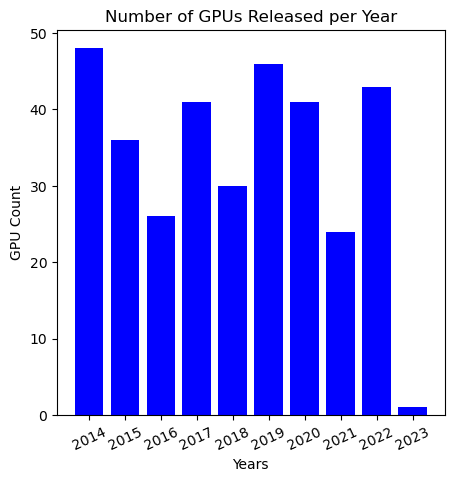

In [21]:
# graphing the number of gpu's released per year

# storing and counting the years from the database
year_counts = df1.value_counts('Release Year')

# separating the values
years = year_counts.index
counts = year_counts.values

# graph
plt.figure(figsize = (5,5))
plt.bar(years, counts, color = 'blue', data = year_counts)
plt.xlabel('Years')
plt.xticks(years, years, rotation = 25)
plt.ylabel('GPU Count')
plt.title('Number of GPU''s Released per Year')
plt.show()

In [23]:
rtx4000 = df1[df1['Product'].str.contains('RTX 40')]
gtx1000 = df1[df1['Product'].str.contains('GTX 10')]
gtx900 = df1[df1['Product'].str.contains('GTX 9')]

print(rtx4000.reset_index())
print(gtx1000)
print(gtx900)

   index Manufacturer              Product  VRAM  Memory Bus Width  GPU Clock  \
0      0       NVIDIA     GeForce RTX 4050     8               128       1925   
1     22       NVIDIA     GeForce RTX 4060    12               192       1925   
2     23       NVIDIA     GeForce RTX 4070    12               192       1925   
3     24       NVIDIA     GeForce RTX 4080    16               256       1925   
4     25       NVIDIA  GeForce RTX 4080 Ti    20               320       1895   
5     26       NVIDIA     GeForce RTX 4090    24               384       1815   

   Memory Clock  Release Year  
0          2250          2023  
1          2250          2022  
2          2250          2022  
3          2250          2022  
4          1325          2022  
5          1325          2022  
    Manufacturer                      Product  VRAM  Memory Bus Width  \
109       NVIDIA      GeForce GTX 1050 Mobile     3                96   
157       NVIDIA             GeForce GTX 1050     3           